<a href="https://colab.research.google.com/github/Im-Akritisingh/Malaria-Detection/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!unzip /content/drive/MyDrive/Malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
import os
import pandas as pd

# Directory containing images
image_dir = '/content/cell_images/Parasitized'

# Get list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Create a DataFrame with the image file names
df = pd.DataFrame(image_files, columns=['image_name'])

# Optionally, add the full path to each image
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(image_dir, x))

# Display the first few rows of the DataFrame
print(df.head())


                                        image_name  \
0    C133P94ThinF_IMG_20151004_154919_cell_139.png   
1       C91P52ThinF_IMG_20150821_125423_cell_3.png   
2   C66P27N_ThinF_IMG_20150818_163419_cell_197.png   
3    C119P80ThinF_IMG_20151002_124345_cell_154.png   
4  C182P143NThinF_IMG_20151201_171905_cell_182.png   

                                          image_path  
0  /content/cell_images/Parasitized/C133P94ThinF_...  
1  /content/cell_images/Parasitized/C91P52ThinF_I...  
2  /content/cell_images/Parasitized/C66P27N_ThinF...  
3  /content/cell_images/Parasitized/C119P80ThinF_...  
4  /content/cell_images/Parasitized/C182P143NThin...  


In [ ]:
len(df)

13780

In [ ]:
import os
import pandas as pd

# Directory containing images
image_dir = '/content/cell_images/Uninfected'

# Get list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Create a DataFrame with the image file names
df = pd.DataFrame(image_files, columns=['image_name'])

# Optionally, add the full path to each image
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(image_dir, x))

# Display the first few rows of the DataFrame
print(df.head())

                                        image_name  \
0         C7NthinF_IMG_20150611_105043_cell_13.png   
1       C238NThinF_IMG_20151207_114038_cell_84.png   
2     C76P37ThinF_IMG_20150815_172902_cell_171.png   
3  C167P128ReThinF_IMG_20151201_105354_cell_27.png   
4         C201ThinF_IMG_20150930_143129_cell_4.png   

                                          image_path  
0  /content/cell_images/Uninfected/C7NthinF_IMG_2...  
1  /content/cell_images/Uninfected/C238NThinF_IMG...  
2  /content/cell_images/Uninfected/C76P37ThinF_IM...  
3  /content/cell_images/Uninfected/C167P128ReThin...  
4  /content/cell_images/Uninfected/C201ThinF_IMG_...  


In [ ]:
len(df)

13780

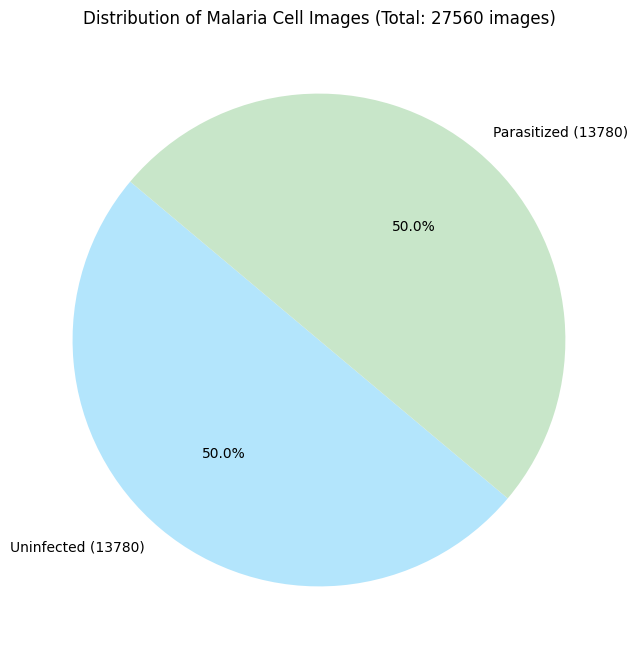

In [ ]:
import os
import matplotlib.pyplot as plt

# Base directory containing images
base_dir = '/content/cell_images'

# Define directories for both categories
uninfected_dir = os.path.join(base_dir, 'Uninfected')
parasitized_dir = os.path.join(base_dir, 'Parasitized')

# Check if Uninfected and Parasitized directories exist
if not os.path.isdir(uninfected_dir):
    raise FileNotFoundError(f"Directory not found: {uninfected_dir}")
if not os.path.isdir(parasitized_dir):
    print(f"Directory not found: {parasitized_dir}. It will be excluded from the pie chart.")
    parasitized_count = 0
else:
    parasitized_count = len([f for f in os.listdir(parasitized_dir) if os.path.isfile(os.path.join(parasitized_dir, f))])

# Get list of all image files in the Uninfected directory
uninfected_count = len([f for f in os.listdir(uninfected_dir) if os.path.isfile(os.path.join(uninfected_dir, f))])

# Calculate total number of images
total_images = uninfected_count + parasitized_count

# Prepare data for the pie chart
total_counts = [uninfected_count, parasitized_count]
labels = [f'Uninfected ({uninfected_count})', f'Parasitized ({parasitized_count})']
colors = ['#B3E5FC', '#C8E6C9']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Malaria Cell Images (Total: {total_images} images)')
plt.show()




In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Directories
infected_dir = '/content/cell_images/Parasitized'
uninfected_dir = '/content/cell_images/Uninfected'

# Get list of all image files in each directory
infected_files = [os.path.join(infected_dir, f) for f in os.listdir(infected_dir) if os.path.isfile(os.path.join(infected_dir, f))]
uninfected_files = [os.path.join(uninfected_dir, f) for f in os.listdir(uninfected_dir) if os.path.isfile(os.path.join(uninfected_dir, f))]

# Create a DataFrame with the image file names and their labels
infected_df = pd.DataFrame(infected_files, columns=['image_path'])
infected_df['label'] = 1

uninfected_df = pd.DataFrame(uninfected_files, columns=['image_path'])
uninfected_df['label'] = 0

# Combine the infected and uninfected DataFrames
df = pd.concat([infected_df, uninfected_df], ignore_index=True)

# Split into train (80%) and test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print("Training Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)


Training Set Shape: (22048, 2)
Test Set Shape: (5512, 2)


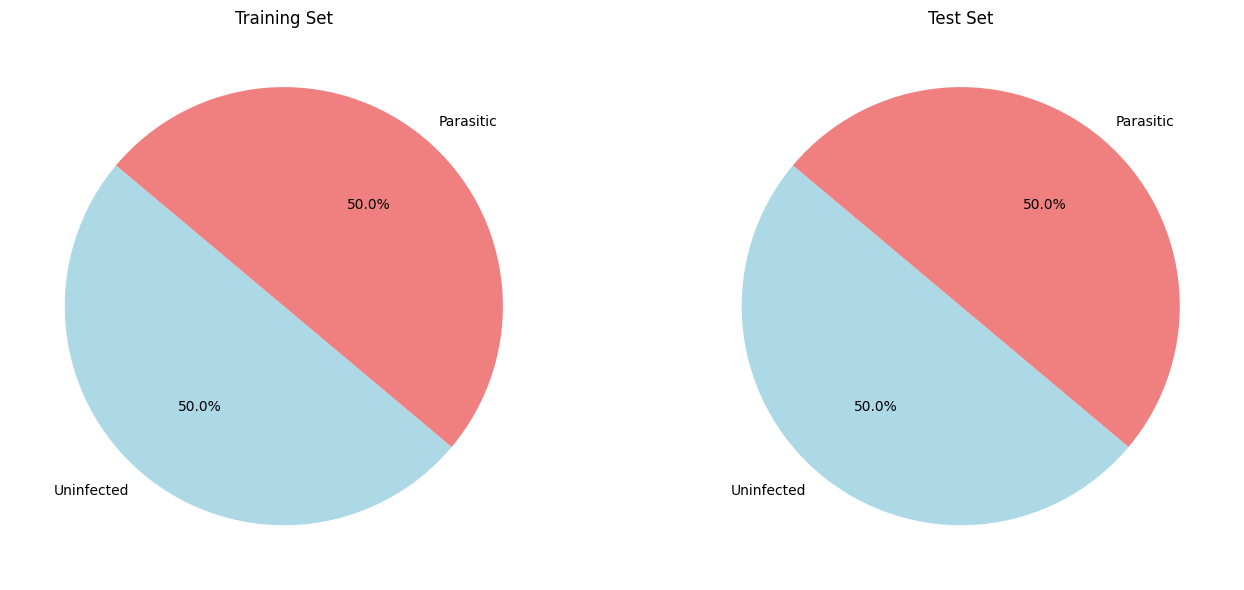

In [ ]:
import matplotlib.pyplot as plt

# Count the number of parasitic and uninfected images in the training set
train_counts = train_df['label'].value_counts()

# Count the number of parasitic and uninfected images in the test set
test_counts = test_df['label'].value_counts()

# Define labels
labels = ['Uninfected', 'Parasitic']

# Create a pie chart for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(train_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Training Set')

# Create a pie chart for the test set
plt.subplot(1, 2, 2)
plt.pie(test_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Test Set')

# Show the plot
plt.tight_layout()
plt.show()

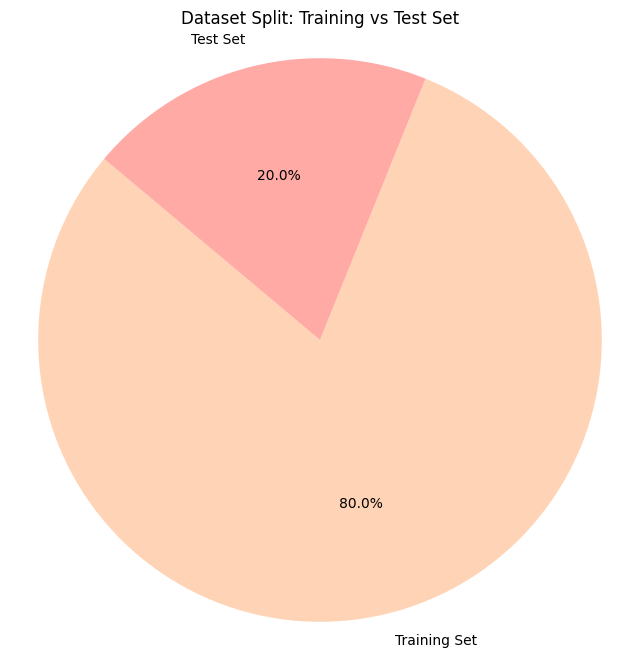

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of images
total_images = len(df)

# Calculate the number of training and test images
train_images = len(train_df)
test_images = len(test_df)

# Calculate the proportions
train_proportion = train_images / total_images
test_proportion = test_images / total_images

# Define labels and sizes for the pie charts
labels = ['Training Set', 'Test Set']
sizes = [train_proportion, test_proportion]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FFD3B6', '#FFAAA5'] )
plt.title('Dataset Split: Training vs Test Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

# Directories
infected_dir = '/content/cell_images/Parasitized'
uninfected_dir = '/content/cell_images/Uninfected'
base_dir = '/content/cell_images'

# Get list of all image files in each directory
infected_files = [os.path.join(infected_dir, f) for f in os.listdir(infected_dir) if os.path.isfile(os.path.join(infected_dir, f))]
uninfected_files = [os.path.join(uninfected_dir, f) for f in os.listdir(uninfected_dir) if os.path.isfile(os.path.join(uninfected_dir, f))]

# Create a DataFrame with the image file names and their labels
infected_df = pd.DataFrame(infected_files, columns=['image_path'])
infected_df['label'] = 1

uninfected_df = pd.DataFrame(uninfected_files, columns=['image_path'])
uninfected_df['label'] = 0

# Combine the infected and uninfected DataFrames
df = pd.concat([infected_df, uninfected_df], ignore_index=True)

# Split into train (80%) and test (20%)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

print("Training Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)

# Create train and test directories
train_infected_dir = os.path.join(base_dir, 'train/Parasitized')
train_uninfected_dir = os.path.join(base_dir, 'train/Uninfected')
test_infected_dir = os.path.join(base_dir, 'test/Parasitized')
test_uninfected_dir = os.path.join(base_dir, 'test/Uninfected')

os.makedirs(train_infected_dir, exist_ok=True)
os.makedirs(train_uninfected_dir, exist_ok=True)
os.makedirs(test_infected_dir, exist_ok=True)
os.makedirs(test_uninfected_dir, exist_ok=True)

# Function to copy images to the appropriate directory
def copy_images(df, infected_dir, uninfected_dir):
    for _, row in df.iterrows():
        src_path = row['image_path']
        if row['label'] == 1:
            dst_dir = infected_dir
        else:
            dst_dir = uninfected_dir

        shutil.copy(src_path, dst_dir)

# Copy train images
copy_images(train_df, train_infected_dir, train_uninfected_dir)

# Copy test images
copy_images(test_df, test_infected_dir, test_uninfected_dir)

print("Images copied successfully to train and test directories.")


Training Set Shape: (22048, 2)
Test Set Shape: (5512, 2)
Images copied successfully to train and test directories.


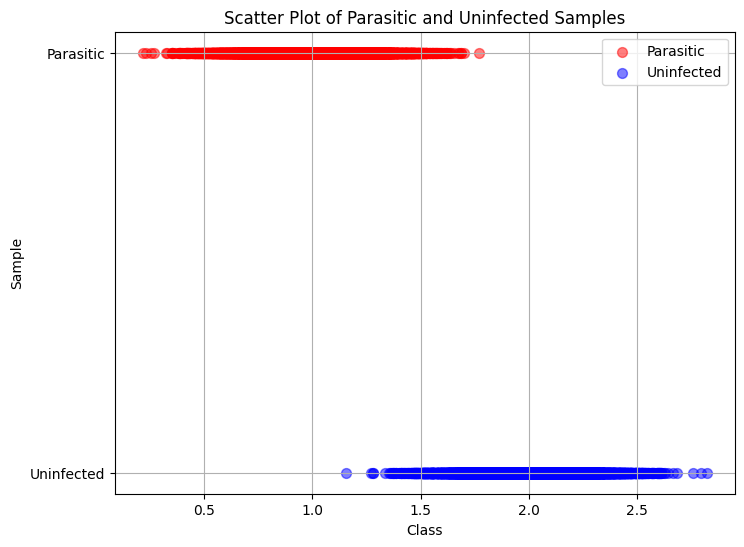

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame with 'parasitic' and 'uninfected' labels
parasitic_samples = df[df['label'] == 1]  # Samples labeled as parasitic
uninfected_samples = df[df['label'] == 0]  # Samples labeled as uninfected

# Add jitter to x-values to prevent overlapping points
jitter = 0.2
parasitic_x = np.random.normal(1, jitter, size=len(parasitic_samples))
uninfected_x = np.random.normal(2, jitter, size=len(uninfected_samples))

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(parasitic_x, [1] * len(parasitic_samples), color='red', label='Parasitic', alpha=0.5, s=50)  # Increase marker size
plt.scatter(uninfected_x, [0] * len(uninfected_samples), color='blue', label='Uninfected', alpha=0.5, s=50)  # Increase marker size
plt.title('Scatter Plot of Parasitic and Uninfected Samples')
plt.xlabel('Class')
plt.ylabel('Sample')
plt.yticks([0, 1], ['Uninfected', 'Parasitic'])  # Replace y-axis ticks with class labels
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:

# Initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
#adding 3rd layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 22047 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('cell_images/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5511 images belonging to 2 classes.


In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 689,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

<ipython-input-26-c4fda1de9f2b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
# Assuming 'classifier' is your Keras model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit_generator(training_set,
                         steps_per_epoch = 689,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

<ipython-input-27-6f28cb007c4f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/10
689/689 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8021

689/689 [==============================] - 180s 256ms/step - loss: 0.3896 - accuracy: 0.8021 - val_loss: 0.1555 - val_accuracy: 0.9526
Epoch 2/10
689/689 [==============================] - 158s 230ms/step - loss: 0.1688 - accuracy: 0.9450
Epoch 3/10
689/689 [==============================] - 152s 221ms/step - loss: 0.1533 - accuracy: 0.9498
Epoch 4/10
689/689 [==============================] - 152s 220ms/step - loss: 0.1446 - accuracy: 0.9517
Epoch 5/10
689/689 [==============================] - 152s 221ms/step - loss: 0.1383 - accuracy: 0.9531
Epoch 6/10
689/689 [==============================] - 151s 218ms/step - loss: 0.1333 - accuracy: 0.9554
Epoch 7/10
689/689 [==============================] - 153s 222ms/step - loss: 0.1318 - accuracy: 0.9543
Epoch 8/10
689/689 [==============================] - 153s 222ms/step - loss: 0.1273 - accuracy: 0.9565
Epoch 9/10
689/689 [==============================] - 154s 223ms/step - loss: 0.1232 - accuracy: 0.9580
Epoch 10/10
689/689 [============

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Save the classifier model
classifier.save("malaria.h5")

# Load the model (optional if you have already loaded the classifier)
model = load_model("malaria.h5")

# Load and preprocess the test image
test_image = image.load_img('/content/cell_images/test/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale the image if the model was trained with rescaled images

# Make a prediction
result = model.predict(test_image)

# Verify the class indices from the training set
class_indices = {'Parasitized': 0, 'Uninfected': 1}  # Replace with training_set.class_indices if available

# Interpret the prediction
if result[0][0] > 0.5:  # Assuming a sigmoid activation in the output layer
    prediction = 'Uninfected'
else:
    prediction = 'Parasitized'

print(f'The prediction for the given image is: {prediction}')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 178ms/step
The prediction for the given image is: Parasitized


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Load the VGG16 model
base_model = VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



Found 22047 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('cell_images/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5511 images belonging to 2 classes.


In [ ]:
# Train the model
classifier.fit(training_set,
                         steps_per_epoch = 689,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/10
689/689 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9219

689/689 [==============================] - 248s 360ms/step - loss: 0.2094 - accuracy: 0.9219 - val_loss: 0.1658 - val_accuracy: 0.9450
Epoch 2/10
689/689 [==============================] - 225s 326ms/step - loss: 0.1498 - accuracy: 0.9509
Epoch 3/10
689/689 [==============================] - 227s 329ms/step - loss: 0.1224 - accuracy: 0.9599
Epoch 4/10
689/689 [==============================] - 223s 324ms/step - loss: 0.1056 - accuracy: 0.9639
Epoch 5/10
689/689 [==============================] - 223s 323ms/step - loss: 0.0913 - accuracy: 0.9678
Epoch 6/10
689/689 [==============================] - 226s 328ms/step - loss: 0.0733 - accuracy: 0.9730
Epoch 7/10
689/689 [==============================] - 227s 329ms/step - loss: 0.0573 - accuracy: 0.9801
Epoch 8/10
689/689 [==============================] - 223s 323ms/step - loss: 0.0420 - accuracy: 0.9855
Epoch 9/10
689/689 [==============================] - 227s 330ms/step - loss: 0.0297 - accuracy: 0.9897
Epoch 10/10
689/689 [============

In [ ]:
# Save the model
model.save('malaria_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the model (assuming the model file is correctly named)
model = load_model('malaria_classification_model.h5')  # Remove extra quotes

# Load and preprocess the test image
test_image_path = '/content/cell_images/test/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale the image if the model was trained with rescaled images

# Make a prediction
result = model.predict(test_image)

# Interpret the prediction
if result[0][0] > 0.5:  # Assuming a sigmoid activation in the output layer
    prediction = 'Uninfected'
else:
    prediction = 'Parasitized'

print(f'The prediction for the given image is: {prediction}')



1/1 [==============================] - 0s 217ms/step
The prediction for the given image is: Uninfected


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Save the classifier model
classifier.save("malaria.h5")

# Load the model (optional if you have already loaded the classifier)
model = load_model("malaria.h5")

# Load and preprocess the test image
test_image = image.load_img('/content/cell_images/test/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale the image if the model was trained with rescaled images

# Make a prediction
result = model.predict(test_image)

# Verify the class indices from the training set
class_indices = {'Parasitized': 0, 'Uninfected': 1}  # Replace with training_set.class_indices if available

# Interpret the prediction
if result[0][0] > 0.5:  # Assuming a sigmoid activation in the output layer
    prediction = 'Uninfected'
else:
    prediction = 'Parasitized'

print(f'The prediction for the given image is: {prediction}')


1/1 [==============================] - 0s 90ms/step
The prediction for the given image is: Parasitized


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Save the classifier model
classifier.save("malaria.h5")

# Load the model (optional if you have already loaded the classifier)
model = load_model("malaria.h5")

# Load and preprocess the test image
test_image = image.load_img('/content/cell_images/test/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_40.png', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Rescale the image if the model was trained with rescaled images

# Make a prediction
result = model.predict(test_image)

# Verify the class indices from the training set
class_indices = {'Parasitized': 0, 'Uninfected': 1}  # Replace with training_set.class_indices if available

# Interpret the prediction
if result[0][0] > 0.5:  # Assuming a sigmoid activation in the output layer
    prediction = 'Uninfected'
else:
    prediction = 'Parasitized'

print(f'The prediction for the given image is: {prediction}')

1/1 [==============================] - 0s 123ms/step
The prediction for the given image is: Uninfected


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Load the VGG19 model
base_model = VGG19(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

# Freeze all the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Convert the labels to strings
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

# Define the training and validation generators
training_set = train_datagen.flow_from_dataframe(train_df, x_col='image_path', y_col='label',
                                                 target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_dataframe(test_df, x_col='image_path', y_col='label',
                                            target_size=(64, 64), batch_size=32, class_mode='binary')

# Define steps_per_epoch and validation_steps
batch_size = 32
steps_per_epoch = len(train_df) // batch_size
validation_steps = len(test_df) // batch_size

# Train the model initially with frozen layers
history = model.fit(training_set,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=validation_steps)

# Unfreeze the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning) the model
history_fine = model.fit(training_set,
                         steps_per_epoch=steps_per_epoch,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=validation_steps)

# Save the fine-tuned model
model.save('malaria_classification_model_vgg19_finetuned.h5')


Found 22047 validated image filenames belonging to 2 classes.
Found 5511 validated image filenames belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


689/689 [==============================] - 1807s 3s/step - loss: 0.3093 - accuracy: 0.8721 - val_loss: 0.2190 - val_accuracy: 0.9168
Epoch 2/10
567/689 [=======================>......] - ETA: 4:12 - loss: 0.2529 - accuracy: 0.8980